<a href="https://colab.research.google.com/github/eangelb29/NGG6050_Assignments/blob/main/Probability_Distributions_2_AB9625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

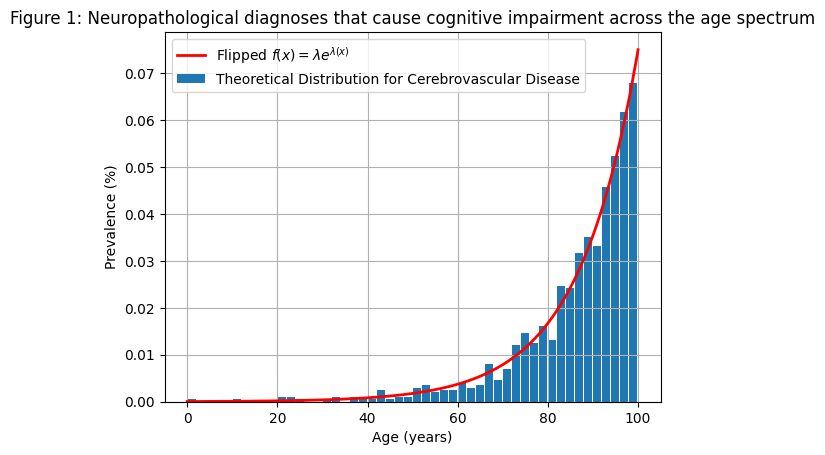

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
delta_t = 1000
plambda = 1  # Rate (events per second)
num_bins_per_second = 100
total_bins = int(delta_t * num_bins_per_second)

# Bin event probability
p = plambda * delta_t / total_bins

# Simulate Poisson process using Bernoulli trials
outcomes = np.random.binomial(1, p, size=total_bins)
event_indices = np.where(outcomes == 1)[0]

# Intervals between events (in seconds)
intervals = np.diff(event_indices) / num_bins_per_second

# Flip the intervals to simulate an "ascending exponential"
max_interval = np.max(intervals)
intervals_flipped = max_interval - intervals

# Normalize flipped intervals to [0, 100] for plotting
intervals_scaled = (intervals_flipped - np.min(intervals_flipped)) / (max_interval - np.min(intervals_flipped)) * 100

# Histogram of scaled flipped intervals
counts, edges = np.histogram(intervals_scaled, bins=50, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2
plt.bar(bin_centers, counts, width=1.8, align='center', label='Theoretical Distribution for Cerebrovascular Disease')

# Flipped exponential PDF over 0 to 100
x_vals = np.linspace(0, 100, 500)
# To maintain shape, scale lambda according to original max_interval:
scaled_lambda = plambda * (max_interval / 100)
pdf_flipped = scaled_lambda * np.exp(-scaled_lambda * (100 - x_vals))

# Overlay the flipped exponential curve
plt.plot(x_vals, pdf_flipped, 'r-', lw=2, label=r'Flipped $f(x) = \lambda e^{\lambda (x)}$')

# Plot settings
plt.title('Figure 1: Neuropathological diagnoses that cause cognitive impairment across the age spectrum')
plt.xlabel('Age (years)')
plt.ylabel('Prevalence (%)')
plt.legend()
plt.grid(True)
plt.show()